In [1]:
import json
import csv
import pandas as pd
import sqlite3
import networkx as nx
import matplotlib as plt
import numpy as np

In [2]:
ls

Feature_Engineering_100.ipynb  profit_from_zero_log.png
Feature_Validation.ipynb       profit_ratio_log.png
GAS-ETH.csv                    relative_buy.png
all_corr.png                   relative_sell.png
avg_trans_log.png              since_minted_log.png
buy_interval_log.png           std_trans_log.png
combined_corr.png              time_corr.png
currency_combined.png          transfer_ratio.png
currency_corr.png              unique_in_ratio.png
in_degree_log.png              unique_out_dist.png
max_trans_log.png              unique_out_dist_norm.png
network_combined.png           unique_out_ratio.png
network_corr.png


In [3]:
conn = sqlite3.connect('../nft_database_100.db')
c = conn.cursor()

In [4]:
df_all = pd.read_sql_query("SELECT * from features", conn)
df_all.head()

,address,in-degree,out-degree,unique-in ratio,unique-out ratio,total in-transaction,total out-transaction,average in-transaction,average out-transaction,std in-transaction,...,interval out-transaction,diff time interval,max trans,avg trans,std trans,avg minted days,market-trend-buy,market-trend-sell,buy-ATR,sell-ATR
0,0x0000000000000000000000000000000000000001,41,0,20.500000,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,...,0,1,20,13.666667,10.969655,3.0,-8.157984,0.000000,-0.469381,0.000000
1,0x000000000000000000000000000000000000d3a0,15,0,15.000000,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,...,0,0,15,15.000000,0.000000,198.0,-2.000733,0.000000,-0.547502,0.000000
2,0x000000000000000000000000000000000000dead,6487,0,2.644517,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,...,0,0,988,6.559151,33.410946,16.0,-1192.681947,0.000000,-0.534330,0.000000
3,0x000000000000660def84e69995117c0176ba446e,1,1,1.000000,1.0,1.317993e-15,1.317993e-15,1.317993e-15,1.317993e-15,0.0,...,0,0,2,2.000000,0.000000,16.0,-0.015537,-0.015537,-0.487529,-0.487529
4,0x000000000000fd461ca2d54e8f4b3e37749df921,2,2,1.000000,2.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,...,0,0,2,2.000000,0.000000,1.0,-0.482716,-0.482716,-0.540923,-0.540923


In [5]:
df = df_all.drop(columns =['address'])
df.head()

,in-degree,out-degree,unique-in ratio,unique-out ratio,total in-transaction,total out-transaction,average in-transaction,average out-transaction,std in-transaction,std out-transaction,...,interval out-transaction,diff time interval,max trans,avg trans,std trans,avg minted days,market-trend-buy,market-trend-sell,buy-ATR,sell-ATR
0,41,0,20.500000,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,...,0,1,20,13.666667,10.969655,3.0,-8.157984,0.000000,-0.469381,0.000000
1,15,0,15.000000,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,...,0,0,15,15.000000,0.000000,198.0,-2.000733,0.000000,-0.547502,0.000000
2,6487,0,2.644517,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,...,0,0,988,6.559151,33.410946,16.0,-1192.681947,0.000000,-0.534330,0.000000
3,1,1,1.000000,1.0,1.317993e-15,1.317993e-15,1.317993e-15,1.317993e-15,0.0,0.0,...,0,0,2,2.000000,0.000000,16.0,-0.015537,-0.015537,-0.487529,-0.487529
4,2,2,1.000000,2.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,...,0,0,2,2.000000,0.000000,1.0,-0.482716,-0.482716,-0.540923,-0.540923


In [26]:
df = df.rename(columns={'total in-transaction volume': 'total in-transaction vol', 'total out-transaction volume': 'total out-transaction vol', 
                   'average in-transaction volume': 'average in-transaction vol', 'average out-transaction volume': 'average out-transaction vol',
                   'SD of in-transaction volume': 'SD in-transaction vol', 'SD of out-transaction volume': 'SD out-transaction vol',
                   'profit-from-zero': 'profit from transfers', 'profit-ratio': 'profit ratio', 
                   'transfer-num': 'transfer ratio', 'interval in-transaction': 'in-transaction interval', 
                   'interval out-transaction': 'out-transaction interval', 'std trans': 'SD trans'})
df.head()

,in-degree,out-degree,unique-in ratio,unique-out ratio,total in-transaction vol,total out-transaction vol,average in-transaction vol,average out-transaction vol,SD in-transaction vol,SD out-transaction vol,...,out-transaction interval,diff time interval,max trans,avg trans,SD trans,avg minted days,market-trend-buy,market-trend-sell,buy-ATR,sell-ATR
0,41,0,20.500000,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,...,0,1,20,13.666667,10.969655,3.0,-8.157984,0.000000,-0.469381,0.000000
1,15,0,15.000000,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,...,0,0,15,15.000000,0.000000,198.0,-2.000733,0.000000,-0.547502,0.000000
2,6487,0,2.644517,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,...,0,0,988,6.559151,33.410946,16.0,-1192.681947,0.000000,-0.534330,0.000000
3,1,1,1.000000,1.0,1.317993e-15,1.317993e-15,1.317993e-15,1.317993e-15,0.0,0.0,...,0,0,2,2.000000,0.000000,16.0,-0.015537,-0.015537,-0.487529,-0.487529
4,2,2,1.000000,2.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,...,0,0,2,2.000000,0.000000,1.0,-0.482716,-0.482716,-0.540923,-0.540923


#### Missing Values

In [27]:
df.isnull().sum()/len(df)

in-degree                      0.0
out-degree                     0.0
unique-in ratio                0.0
unique-out ratio               0.0
total in-transaction vol       0.0
total out-transaction vol      0.0
average in-transaction vol     0.0
average out-transaction vol    0.0
SD in-transaction vol          0.0
SD out-transaction vol         0.0
profit from transfers          0.0
profit ratio                   0.0
transfer ratio                 0.0
relative-buy                   0.0
relative-sell                  0.0
in-transaction interval        0.0
out-transaction interval       0.0
diff time interval             0.0
max trans                      0.0
avg trans                      0.0
SD trans                       0.0
avg minted days                0.0
market-trend-buy               0.0
market-trend-sell              0.0
buy-ATR                        0.0
sell-ATR                       0.0
dtype: float64

#### Feature Variance

In [28]:
from sklearn.feature_selection import VarianceThreshold
vt = VarianceThreshold(threshold=0.6)
vt.fit(df)

mask = vt.get_support()
chosen_features = list(df.loc[:, mask].columns)
removed_features = [feature for feature in df.columns if feature not in chosen_features]

print('Chosen features: {}'.format(chosen_features))
print('Removed features: {}'.format(removed_features))

Chosen features: ['in-degree', 'out-degree', 'unique-in ratio', 'unique-out ratio', 'total in-transaction vol', 'total out-transaction vol', 'average in-transaction vol', 'average out-transaction vol', 'SD in-transaction vol', 'SD out-transaction vol', 'profit from transfers', 'profit ratio', 'transfer ratio', 'relative-buy', 'relative-sell', 'in-transaction interval', 'out-transaction interval', 'diff time interval', 'max trans', 'avg trans', 'SD trans', 'avg minted days', 'market-trend-buy', 'market-trend-sell']
Removed features: ['buy-ATR', 'sell-ATR']


#### Feature Correlation

<AxesSubplot:>

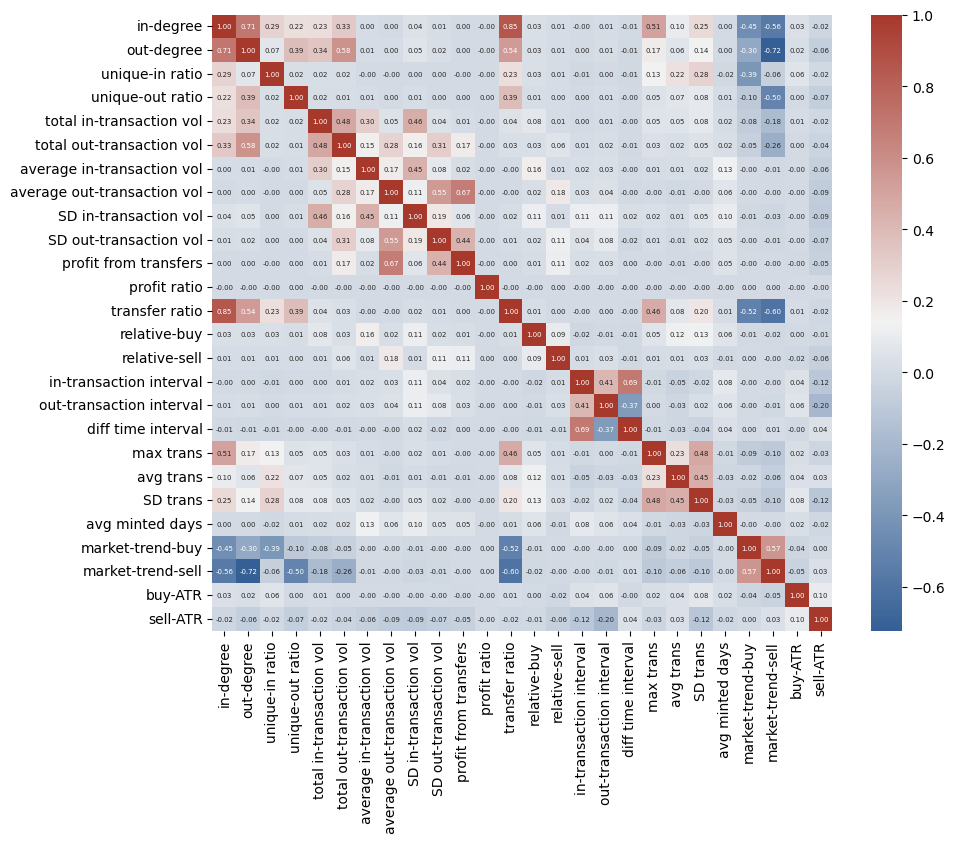

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

cor = df.corr()
cmap = sns.diverging_palette(250, 15, s=75, l=40,
                             n=9, center="light", as_cmap=True)

plt.figure(figsize = (10,8))
sns.heatmap(cor,annot=True,annot_kws={"size": 5},fmt=".2f",cmap=cmap)

In [9]:
print(cor)

                          in-degree  out-degree  unique-in ratio  \
in-degree                  1.000000    0.709623         0.286094   
out-degree                 0.709623    1.000000         0.069587   
unique-in ratio            0.286094    0.069587         1.000000   
unique-out ratio           0.222325    0.385217         0.022665   
total in-transaction       0.232774    0.342390         0.023889   
total out-transaction      0.331005    0.581715         0.018197   
average in-transaction     0.004597    0.008786        -0.002227   
average out-transaction    0.000711    0.004790        -0.002793   
std in-transaction         0.038360    0.052207         0.003312   
std out-transaction        0.012729    0.021523         0.002958   
profit-from-zero           0.000151    0.002552        -0.001174   
profit-ratio              -0.000018   -0.000100        -0.000175   
transfer-num               0.845792    0.540981         0.227419   
relative-buy               0.028372    0.027193 

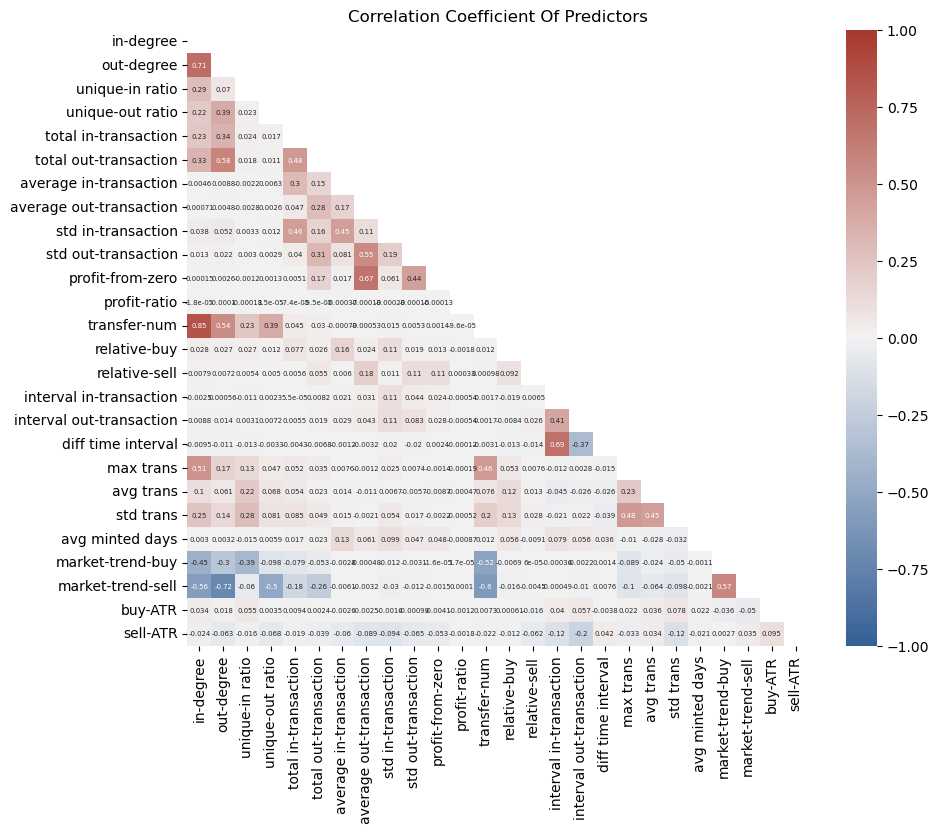

In [10]:
plt.figure(figsize=(10,8))

mask = np.triu(np.ones_like(df.corr(), dtype=bool))
cmap = sns.diverging_palette(250, 15, s=75, l=40,
                             n=9, center="light", as_cmap=True)


sns.heatmap(df.corr(), annot=True, annot_kws={"size": 5}, mask=mask, vmin=-1, vmax=1,cmap=cmap)
plt.title('Correlation Coefficient Of Predictors')
plt.show()

In [17]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# compute the vif for all given features
def compute_vif(considered_features):
    
    X = df[considered_features]
    X['intercept'] = 1
    
    vif = pd.DataFrame()
    vif["Variable"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif = vif[vif['Variable']!='intercept']
    return vif

considered_features = ['in-degree', 'out-degree', 'unique in-degree', 'unique out-degree']
compute_vif(considered_features)

/tmp/ipykernel_181603/1043054126.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['intercept'] = 1


,Variable,VIF
0,in-degree,2.885429
1,out-degree,4.495702
2,unique in-degree,3.602222
3,unique out-degree,3.859482


In [11]:
df_wallets = pd.read_sql_query("SELECT * from all_wallets", conn)
df_wallets = df_wallets[df_wallets["address"] != "0x0000000000000000000000000000000000000000"]
df_wallets.head()

,address
0,0x36a5bc205df1ed65c86301022cfc343a6ce546ff
1,0x9106b49a05f842b58d56f8a5aea404d654867e26
2,0x802fa804b97ccef82331243feb6ba56c9b4281e0
3,0x9a3c2b6eeaa38ffb167abdd1b87dfa8d32845a9d
4,0xcb43971645190ca9181f26e4f40eade20d51f39f


In [12]:
df_wallets.shape[0]

123931

## Network Features

### In-Degree Analysis

In [14]:
buy_df = pd.read_sql_query("SELECT block_timestamp,to_address as address from combined_table_new", conn)
buys = df_wallets.merge(buy_df, how = 'left')
buys = buys.groupby(['address']).count()
buys = buys.rename(columns={'block_timestamp':'in-degree'})
buys = buys.reset_index()
buys.head()

,address,in-degree
0,0x0000000000000000000000000000000000000001,1
1,0x000000000000000000000000000000000000dead,3
2,0x0000000000015b23c7e20b0ea5ebd84c39dcbe60,1
3,0x000000000004d7463d0f9c77383600bc82d612f5,6
4,0x000000000006b92d1ca16b6e55071e8b5626d5d6,1


In [15]:
print(buys.describe())
print("account number:",buys.shape[0])

           in-degree
count  123931.000000
mean        3.974655
std        53.299706
min         0.000000
25%         1.000000
50%         1.000000
75%         3.000000
max     15381.000000
account number: 123931


<AxesSubplot:>

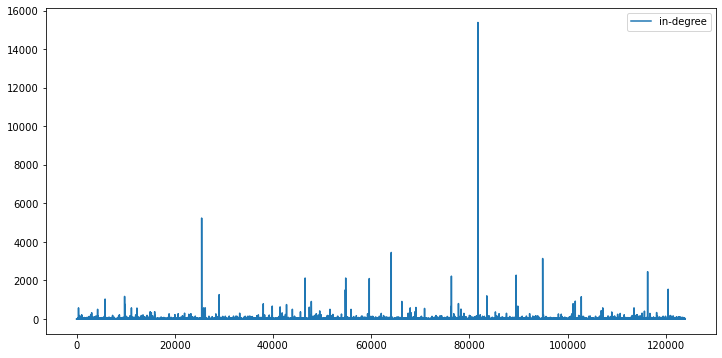

In [16]:
buys.plot(figsize=((12,6)))

In [21]:
buy_analysis = buys.sort_values(by=['in-degree'],ascending=False)
buy_analysis.head(10)

,address,in-degree
81721,0xa858ddc0445d8131dac4d1de01f834ffcba52ef1,15381
25477,0x34380456f50e013f1b8b2b9b5dc9d55fb0ca9c2b,5235
64079,0x83c8f28c26bf6aaca652df1dbbe0e1b56f8baba2,3451
94903,0xc310e760778ecbca4c65b6c559874757a4c4ece0,3138
116273,0xef9497439548c5967b179d80a49e829efa2a9300,2454
89509,0xb7f7f6c52f2e2fdb1963eab30438024864c313f6,2271
76323,0x9cfa73b8d300ec5bf204e4de4a58e5ee6b7dc93c,2222
46545,0x5f6ac80cdb9e87f3cfa6a90e5140b9a16a361d5c,2124
54807,0x70b97a0da65c15dfb0ffa02aee6fa36e507c2762,2124
59603,0x7a9fe22691c811ea339d9b73150e6911a5343dca,2097


### Out-Degree (total number of buyers an account has interacted with)

In [11]:
sell_df = pd.read_sql_query("SELECT block_timestamp,from_address as address from combined_table_new", conn)
sells = df_wallets.merge(sell_df, how = 'left')
sells = sells.groupby(['address']).count()
sells = sells.rename(columns={'block_timestamp':'out-degree'})
sells = sells.reset_index()
sells.head()

,address,out-degree
0,0x0000000000000000000000000000000000000001,0
1,0x000000000000000000000000000000000000dead,0
2,0x0000000000015b23c7e20b0ea5ebd84c39dcbe60,0
3,0x000000000004d7463d0f9c77383600bc82d612f5,5
4,0x000000000006b92d1ca16b6e55071e8b5626d5d6,1


In [12]:
print(buys.describe())
print("account number:",buys.shape[0])

           in-degree
count  123931.000000
mean        3.974655
std        53.299706
min         0.000000
25%         1.000000
50%         1.000000
75%         3.000000
max     15381.000000
account number: 123931


<AxesSubplot:>

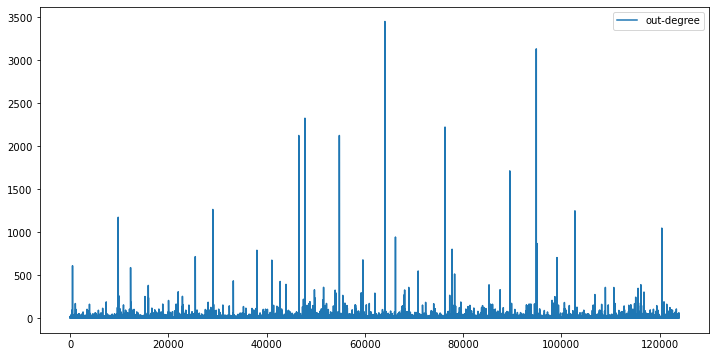

In [13]:
sells.plot(figsize=((12,6)))

### Unique In-Degree (total number of distinct sellers an account has interacted with)

In [14]:
unique_in_df = pd.read_sql_query("SELECT to_address as address,from_address as seller from combined_table_new", conn)
unique_in_df = unique_in_df.drop_duplicates()
unique_in_df = df_wallets.merge(unique_in_df, how = 'left')
unique_in_df = unique_in_df.groupby(['address']).count()
unique_in_df = unique_in_df.rename(columns={'seller':'unique in-degree'})
unique_in_df = unique_in_df.reset_index()
unique_in_df.head()

,address,unique in-degree
0,0x0000000000000000000000000000000000000001,1
1,0x000000000000000000000000000000000000dead,2
2,0x0000000000015b23c7e20b0ea5ebd84c39dcbe60,1
3,0x000000000004d7463d0f9c77383600bc82d612f5,6
4,0x000000000006b92d1ca16b6e55071e8b5626d5d6,1


In [15]:
print(unique_in_df.describe())
print("account number:",unique_in_df.shape[0])

       unique in-degree
count     123931.000000
mean           2.009965
std            8.018209
min            0.000000
25%            1.000000
50%            1.000000
75%            2.000000
max         1728.000000
account number: 123931


<AxesSubplot:>

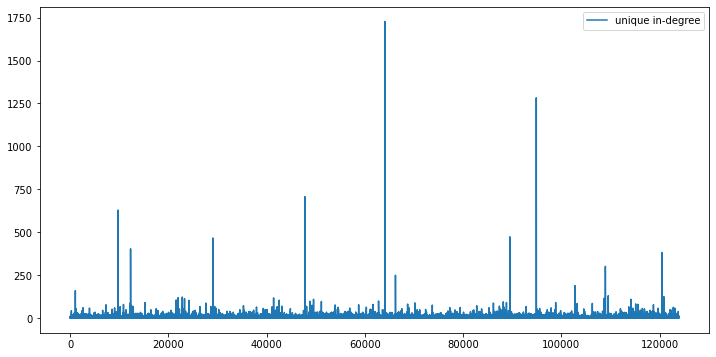

In [16]:
unique_in_df.plot(figsize=((12,6)))

### Unique Out-Degree (total number of distinct buyers an account has interacted with)

In [17]:
unique_out_df = pd.read_sql_query("SELECT from_address as address,to_address as buyer from combined_table_new", conn)
unique_out_df = unique_out_df.drop_duplicates()
unique_out_df = df_wallets.merge(unique_out_df, how = 'left')
unique_out_df = unique_out_df.groupby(['address']).count()
unique_out_df = unique_out_df.rename(columns={'buyer':'unique out-degree'})
unique_out_df = unique_out_df.reset_index()
unique_out_df.head()

,address,unique out-degree
0,0x0000000000000000000000000000000000000001,0
1,0x000000000000000000000000000000000000dead,0
2,0x0000000000015b23c7e20b0ea5ebd84c39dcbe60,0
3,0x000000000004d7463d0f9c77383600bc82d612f5,5
4,0x000000000006b92d1ca16b6e55071e8b5626d5d6,1


In [18]:
print(unique_out_df.describe())
print("account number:",unique_out_df.shape[0])

       unique out-degree
count      123931.000000
mean            1.713881
std             9.493918
min             0.000000
25%             0.000000
50%             1.000000
75%             2.000000
max          1724.000000
account number: 123931


<AxesSubplot:>

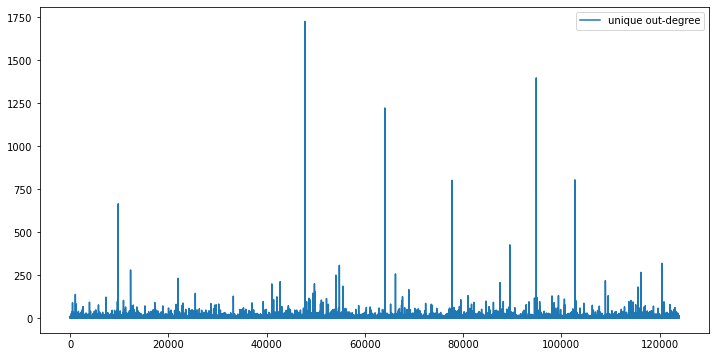

In [19]:
unique_out_df.plot(figsize=((12,6)))

### Network features combined

In [20]:
network_features = buys.merge(sells).merge(unique_in_df).merge(unique_out_df)
network_features.head()

,address,in-degree,out-degree,unique in-degree,unique out-degree
0,0x0000000000000000000000000000000000000001,1,0,1,0
1,0x000000000000000000000000000000000000dead,3,0,2,0
2,0x0000000000015b23c7e20b0ea5ebd84c39dcbe60,1,0,1,0
3,0x000000000004d7463d0f9c77383600bc82d612f5,6,5,6,5
4,0x000000000006b92d1ca16b6e55071e8b5626d5d6,1,1,1,1


In [21]:
print("account number:",network_features.shape[0])

account number: 123931


<AxesSubplot:>

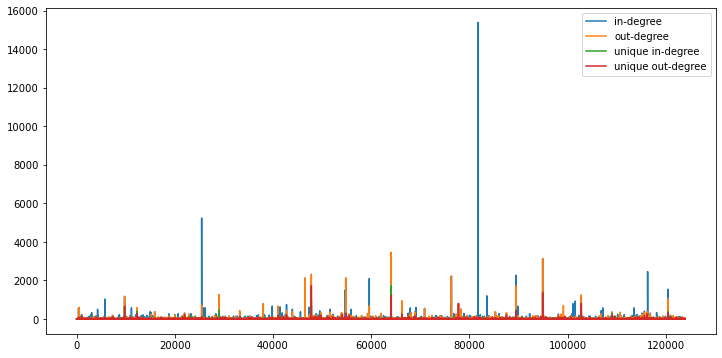

In [22]:
network_features.plot(figsize=((12,6)))

## Currency Features

### total In-transaction: total amount bought in usd

In [23]:
total_in = pd.read_sql_query("SELECT to_address as address, price from combined_table_new", conn)
total_in = df_wallets.merge(total_in, how = 'left')
total_in = total_in.groupby(['address']).sum()
total_in = total_in.rename(columns={'price':'total in-transaction'})
total_in = total_in.reset_index()
total_in.head()

,address,total in-transaction
0,0x0000000000000000000000000000000000000001,0.0000
1,0x000000000000000000000000000000000000dead,0.0000
2,0x0000000000015b23c7e20b0ea5ebd84c39dcbe60,0.0000
3,0x000000000004d7463d0f9c77383600bc82d612f5,84889.1029
4,0x000000000006b92d1ca16b6e55071e8b5626d5d6,11943.5436


In [24]:
print(total_in.describe())
print("account number:",total_in.shape[0])

       total in-transaction
count          1.239310e+05
mean           7.329993e+04
std            1.528261e+06
min            0.000000e+00
25%            0.000000e+00
50%            0.000000e+00
75%            2.338532e+04
max            2.765213e+08
account number: 123931


<AxesSubplot:>

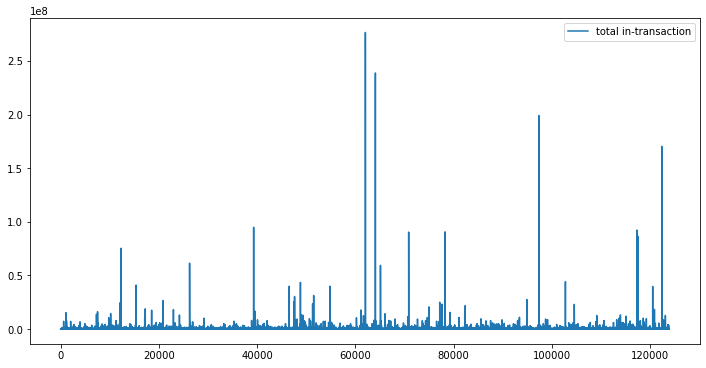

In [25]:
total_in.plot(figsize=((12,6)))

### total Out-transaction: total amount sold in usd

In [26]:
total_out = pd.read_sql_query("SELECT from_address as address, price from combined_table_new", conn)
total_out = df_wallets.merge(total_out, how = 'left')
total_out = total_out.groupby(['address']).sum()
total_out = total_out.rename(columns={'price':'total out-transaction'})
total_out = total_out.reset_index()
total_out.head()

,address,total out-transaction
0,0x0000000000000000000000000000000000000001,0.0000
1,0x000000000000000000000000000000000000dead,0.0000
2,0x0000000000015b23c7e20b0ea5ebd84c39dcbe60,0.0000
3,0x000000000004d7463d0f9c77383600bc82d612f5,65660.6140
4,0x000000000006b92d1ca16b6e55071e8b5626d5d6,11943.5436


In [27]:
print(total_out.describe())
print("account number:",total_out.shape[0])

       total out-transaction
count           1.239310e+05
mean            6.850908e+04
std             1.775351e+06
min             0.000000e+00
25%             0.000000e+00
50%             0.000000e+00
75%             2.068799e+04
max             4.376208e+08
account number: 123931


<AxesSubplot:>

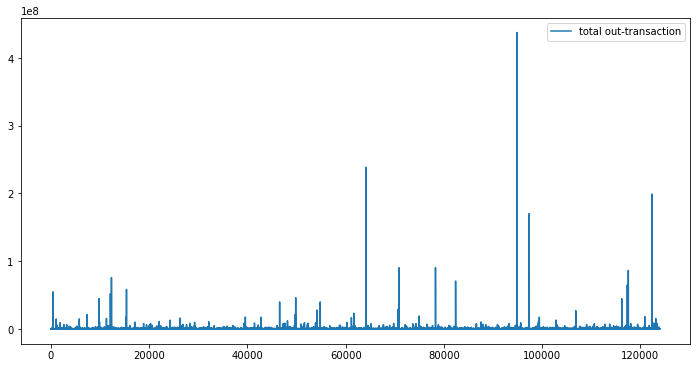

In [28]:
total_out.plot(figsize=((12,6)))

### average in-transaction: average amount bought in usd

In [29]:
average_in = pd.read_sql_query("SELECT to_address as address, price from combined_table_new", conn)
average_in = df_wallets.merge(average_in, how = 'left')
average_in = average_in.groupby(['address']).mean()
average_in = average_in.rename(columns={'price':'average in-transaction'})
average_in = average_in.reset_index()
average_in.head()

,address,average in-transaction
0,0x0000000000000000000000000000000000000001,0.000000
1,0x000000000000000000000000000000000000dead,0.000000
2,0x0000000000015b23c7e20b0ea5ebd84c39dcbe60,0.000000
3,0x000000000004d7463d0f9c77383600bc82d612f5,14148.183817
4,0x000000000006b92d1ca16b6e55071e8b5626d5d6,11943.543600


In [30]:
print(average_in.describe())
print("account number:",average_in.shape[0])

       average in-transaction
count            1.141740e+05
mean             1.559047e+04
std              6.420944e+04
min              0.000000e+00
25%              0.000000e+00
50%              1.670396e+03
75%              1.297372e+04
max              6.534540e+06
account number: 123931


<AxesSubplot:>

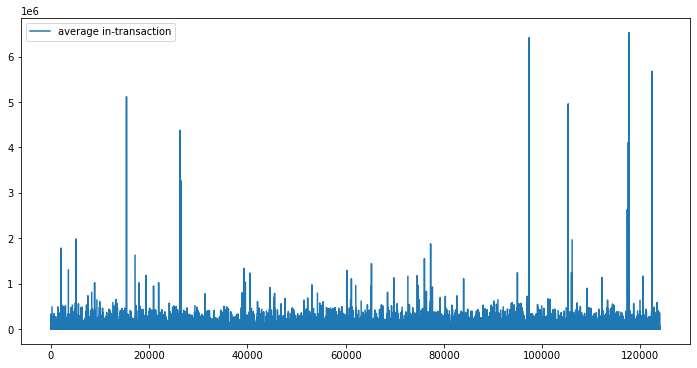

In [31]:
average_in.plot(figsize=((12,6)))

### average out-transaction: average amount sold in usd

In [32]:
average_out = pd.read_sql_query("SELECT from_address as address, price from combined_table_new", conn)
average_out = df_wallets.merge(average_out, how = 'left')
average_out = average_out.groupby(['address']).mean()
average_out = average_out.rename(columns={'price':'average out-transaction'})
average_out = average_out.reset_index()
average_out.head()

,address,average out-transaction
0,0x0000000000000000000000000000000000000001,NaN
1,0x000000000000000000000000000000000000dead,NaN
2,0x0000000000015b23c7e20b0ea5ebd84c39dcbe60,NaN
3,0x000000000004d7463d0f9c77383600bc82d612f5,13132.1228
4,0x000000000006b92d1ca16b6e55071e8b5626d5d6,11943.5436


In [33]:
print(average_out.describe())
print("account number:",average_out.shape[0])

       average out-transaction
count             8.152400e+04
mean              2.144165e+04
std               7.762069e+04
min               0.000000e+00
25%               0.000000e+00
50%               2.707840e+03
75%               2.122698e+04
max               7.293931e+06
account number: 123931


<AxesSubplot:>

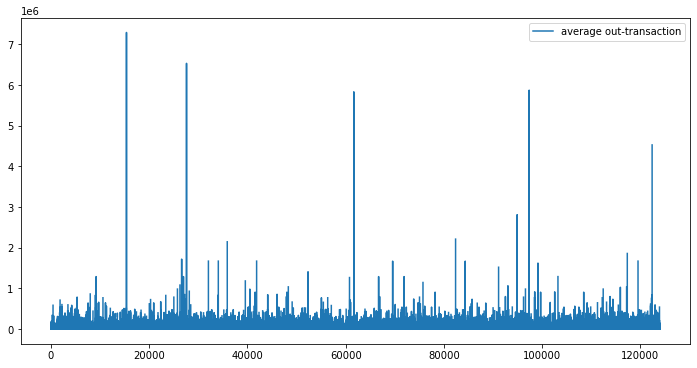

In [34]:
average_out.plot(figsize=((12,6)))

### in-transaction standard deviation

In [35]:
std_in = pd.read_sql_query("SELECT to_address as address, price from combined_table_new", conn)
std_in = df_wallets.merge(std_in, how = 'left')
std_in = std_in.groupby(['address']).std()
std_in = std_in.rename(columns={'price':'std in-transaction'})
std_in = std_in.reset_index()
std_in.head()

,address,std in-transaction
0,0x0000000000000000000000000000000000000001,NaN
1,0x000000000000000000000000000000000000dead,0.000000
2,0x0000000000015b23c7e20b0ea5ebd84c39dcbe60,NaN
3,0x000000000004d7463d0f9c77383600bc82d612f5,9149.567249
4,0x000000000006b92d1ca16b6e55071e8b5626d5d6,NaN


In [36]:
print(std_in.describe())
print("account number:",std_in.shape[0])

       std in-transaction
count        5.369600e+04
mean         1.639263e+04
std          8.630016e+04
min          0.000000e+00
25%          0.000000e+00
50%          2.295493e+03
75%          1.511557e+04
max          1.333391e+07
account number: 123931


<AxesSubplot:>

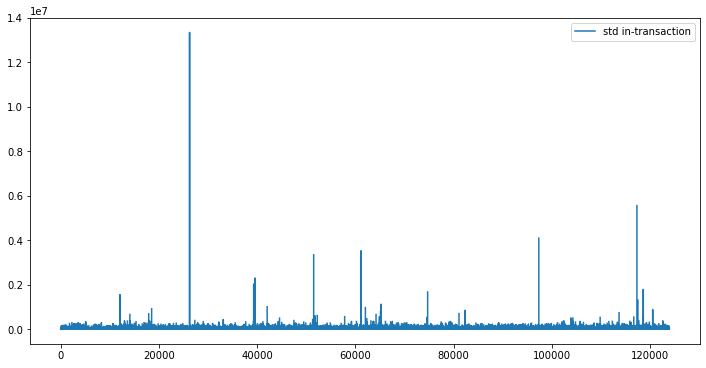

In [37]:
std_in.plot(figsize=((12,6)))

### out-transaction standard deviation

In [38]:
std_out = pd.read_sql_query("SELECT from_address as address, price from combined_table_new", conn)
std_out = df_wallets.merge(std_out, how = 'left')
std_out = std_out.groupby(['address']).std()
std_out = std_out.rename(columns={'price':'std out-transaction'})
std_out = std_out.reset_index()
std_out.head()

,address,std out-transaction
0,0x0000000000000000000000000000000000000001,NaN
1,0x000000000000000000000000000000000000dead,NaN
2,0x0000000000015b23c7e20b0ea5ebd84c39dcbe60,NaN
3,0x000000000004d7463d0f9c77383600bc82d612f5,9131.052302
4,0x000000000006b92d1ca16b6e55071e8b5626d5d6,NaN


In [39]:
print(std_out.describe())
print("account number:",std_out.shape[0])

       std out-transaction
count         3.880700e+04
mean          2.578606e+04
std           1.155298e+05
min           0.000000e+00
25%           0.000000e+00
50%           6.078581e+03
75%           2.282352e+04
max           1.166752e+07
account number: 123931


<AxesSubplot:>

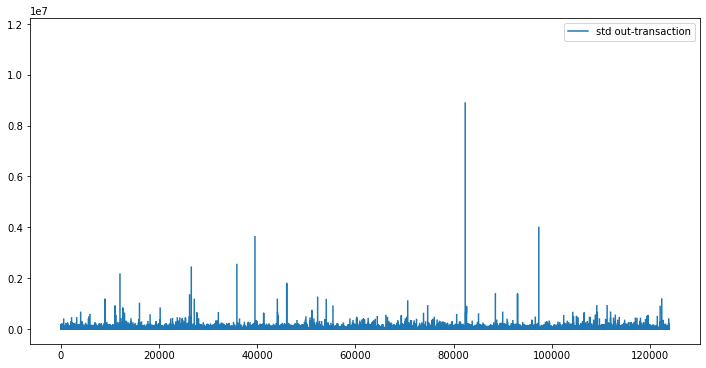

In [40]:
std_out.plot(figsize=((12,6)))

### difference between average in/out-transaction: in-transaction - out-transaction

In [41]:
average_diff = average_out.merge(average_in)
average_diff['diff-in-out'] = average_diff['average in-transaction'] - average_diff['average out-transaction']
average_diff = average_diff.drop(columns = ['average out-transaction','average in-transaction'])
average_diff.head()

,address,diff-in-out
0,0x0000000000000000000000000000000000000001,NaN
1,0x000000000000000000000000000000000000dead,NaN
2,0x0000000000015b23c7e20b0ea5ebd84c39dcbe60,NaN
3,0x000000000004d7463d0f9c77383600bc82d612f5,1016.061017
4,0x000000000006b92d1ca16b6e55071e8b5626d5d6,0.000000


In [42]:
print(average_diff.describe())
print("account number:",average_diff.shape[0])

        diff-in-out
count  7.176700e+04
mean  -4.635058e+03
std    7.912580e+04
min   -6.534540e+06
25%   -9.874294e+03
50%    0.000000e+00
75%    5.485831e+03
max    6.534540e+06
account number: 123931


<AxesSubplot:>

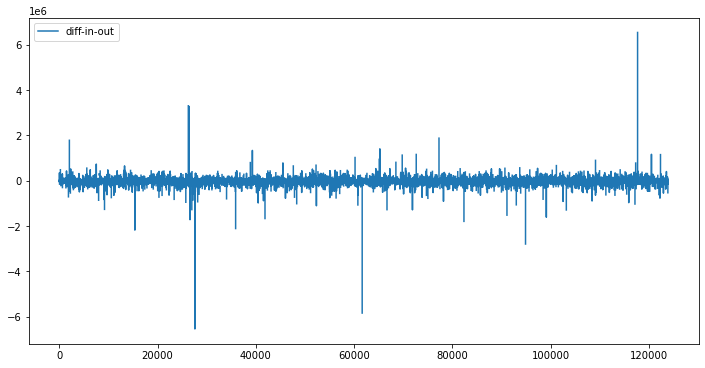

In [43]:
average_diff.plot(figsize=((12,6)))

### currency features combined

In [44]:
currency_features = total_in.merge(total_out).merge(average_in).merge(average_out).merge(std_in).merge(std_out).merge(average_diff)
currency_features.head()

,address,total in-transaction,total out-transaction,average in-transaction,average out-transaction,std in-transaction,std out-transaction,diff-in-out
0,0x0000000000000000000000000000000000000001,0.0000,0.0000,0.000000,NaN,NaN,NaN,NaN
1,0x000000000000000000000000000000000000dead,0.0000,0.0000,0.000000,NaN,0.000000,NaN,NaN
2,0x0000000000015b23c7e20b0ea5ebd84c39dcbe60,0.0000,0.0000,0.000000,NaN,NaN,NaN,NaN
3,0x000000000004d7463d0f9c77383600bc82d612f5,84889.1029,65660.6140,14148.183817,13132.1228,9149.567249,9131.052302,1016.061017
4,0x000000000006b92d1ca16b6e55071e8b5626d5d6,11943.5436,11943.5436,11943.543600,11943.5436,NaN,NaN,0.000000


In [45]:
print("account number:",currency_features.shape[0])

account number: 123931


<AxesSubplot:>

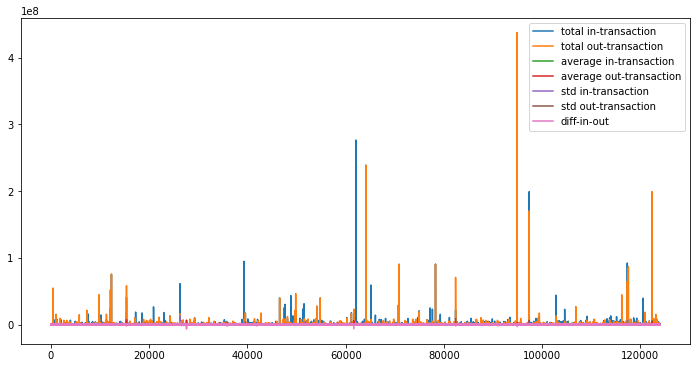

In [46]:
currency_features.plot(figsize=((12,6)))

## Time-based features

### average time interval between in-transactions

In [47]:
average_time_in = pd.read_sql_query("SELECT to_address as address, block_timestamp as time from combined_table_new", conn)
average_time_in = df_wallets.merge(average_time_in, how = 'left')
average_time_in['time'] = pd.to_datetime(average_time_in['time'])
average_time_in = average_time_in.groupby('address').agg({
         'time': lambda group: group.sort_values().diff().mean()})
average_time_in = average_time_in.rename(columns={'time':'interval in-transaction'})
average_time_in = average_time_in.reset_index()
average_time_in.head()

,address,interval in-transaction
0,0x0000000000000000000000000000000000000001,NaT
1,0x000000000000000000000000000000000000dead,12 days 13:14:34.500000
2,0x0000000000015b23c7e20b0ea5ebd84c39dcbe60,NaT
3,0x000000000004d7463d0f9c77383600bc82d612f5,13 days 13:10:05.600000
4,0x000000000006b92d1ca16b6e55071e8b5626d5d6,NaT


In [48]:
print(average_time_in.describe())
print("account number:",average_time_in.shape[0])

          interval in-transaction
count                       53696
mean   28 days 21:19:19.145248023
std    53 days 06:06:48.286339470
min               0 days 00:00:00
25%               0 days 02:21:28
50%     9 days 11:03:34.916666666
75%    34 days 21:45:56.446428571
max            1511 days 23:59:16
account number: 123931


<AxesSubplot:>

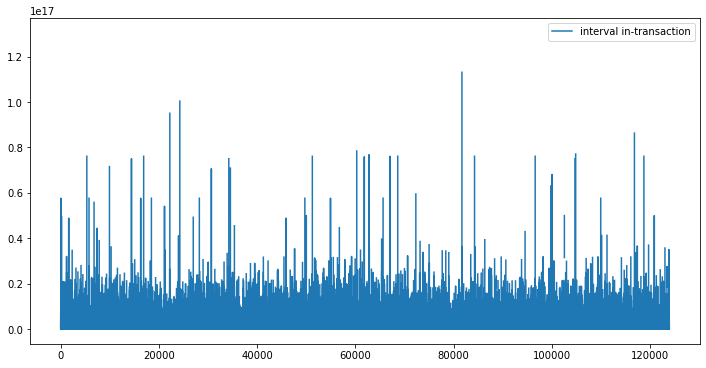

In [49]:
average_time_in.plot(figsize=((12,6)))

### average time interval between out-transactions

In [50]:
average_time_out = pd.read_sql_query("SELECT from_address as address, block_timestamp as time from combined_table_new", conn)
average_time_out = df_wallets.merge(average_time_out, how = 'left')
average_time_out['time'] = pd.to_datetime(average_time_out['time'])
average_time_out = average_time_out.groupby('address').agg({
         'time': lambda group: group.sort_values().diff().mean()})
average_time_out = average_time_out.rename(columns={'time':'interval out-transaction'})
average_time_out = average_time_out.reset_index()
average_time_out.head()

,address,interval out-transaction
0,0x0000000000000000000000000000000000000001,NaT
1,0x000000000000000000000000000000000000dead,NaT
2,0x0000000000015b23c7e20b0ea5ebd84c39dcbe60,NaT
3,0x000000000004d7463d0f9c77383600bc82d612f5,15 days 13:39:38.250000
4,0x000000000006b92d1ca16b6e55071e8b5626d5d6,NaT


In [51]:
print(average_time_out.describe())
print("account number:",average_time_out.shape[0])

         interval out-transaction
count                       38807
mean   28 days 23:53:08.867039040
std    44 days 17:14:40.653463955
min               0 days 00:00:00
25%               1 days 12:08:02
50%       13 days 04:09:04.750000
75%    36 days 13:35:52.214285714
max             887 days 19:08:12
account number: 123931


<AxesSubplot:>

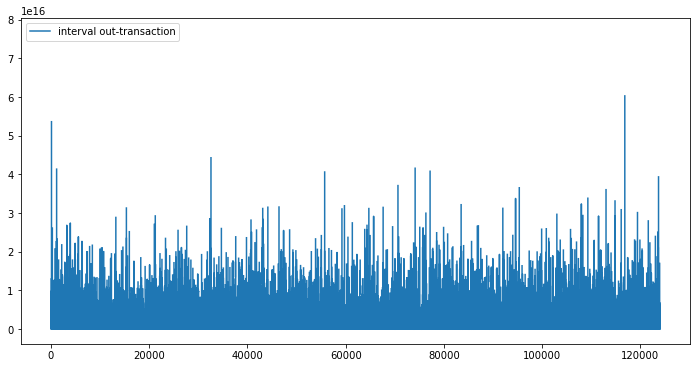

In [52]:
average_time_out.plot(figsize=((12,6)))

### difference between average time interval of in/out-transactions

In [53]:
diff_time_interval = average_time_in.merge(average_time_out)
diff_time_interval['diff time interval'] = diff_time_interval['interval in-transaction'] - diff_time_interval['interval out-transaction']
diff_time_interval = diff_time_interval.drop(columns = ["interval in-transaction","interval out-transaction"])
diff_time_interval.head()


,address,diff time interval
0,0x0000000000000000000000000000000000000001,NaT
1,0x000000000000000000000000000000000000dead,NaT
2,0x0000000000015b23c7e20b0ea5ebd84c39dcbe60,NaT
3,0x000000000004d7463d0f9c77383600bc82d612f5,-3 days +23:30:27.350000
4,0x000000000006b92d1ca16b6e55071e8b5626d5d6,NaT


In [54]:
print(diff_time_interval.describe())
print("account number:",diff_time_interval.shape[0])

                 diff time interval
count                         33425
mean    -1 days +03:22:40.734462861
std      42 days 08:06:31.198573319
min             -419 days +02:17:11
25%     -8 days +22:58:12.356725146
50%               -1 days +23:53:34
75%       4 days 07:22:07.492063492
max    1499 days 18:50:30.384615385
account number: 123931


<AxesSubplot:>

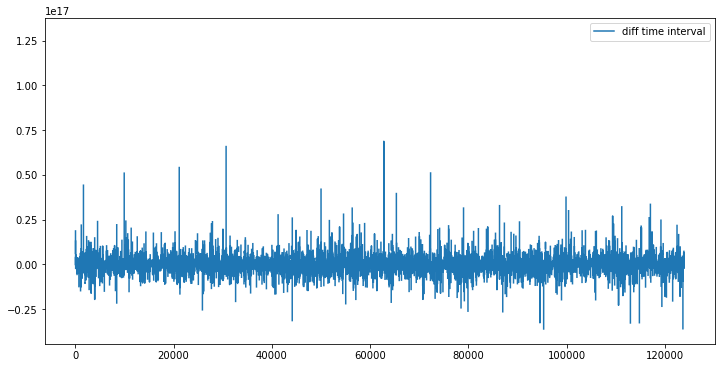

In [55]:
diff_time_interval.plot(figsize=((12,6)))

### Max transaction per day

In [114]:
df1 = pd.read_sql_query("SELECT block_timestamp,from_address as address from combined_table_new", conn)
df2 = pd.read_sql_query("SELECT block_timestamp,to_address as address from combined_table_new", conn)
max_trans = pd.concat([df1,df2])
max_trans = max_trans[max_trans['address'] != "0x0000000000000000000000000000000000000000"]
max_trans['time'] = pd.to_datetime(max_trans['block_timestamp'])
max_trans = max_trans.groupby(['address','time']).count().max(level=0)
max_trans = max_trans.rename(columns={'block_timestamp':'max trans'})
max_trans = max_trans.reset_index()
max_trans.head()

/var/folders/05/23_04t197bs1fqrr4zpwzfl40000gn/T/ipykernel_70930/2030634110.py:6: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.median(level=1) should use df.groupby(level=1).median().
  max_trans = max_trans.groupby(['address','time']).count().max(level=0)


,address,max trans
0,0x0000000000000000000000000000000000000001,1
1,0x000000000000000000000000000000000000dead,1
2,0x0000000000015b23c7e20b0ea5ebd84c39dcbe60,1
3,0x000000000004d7463d0f9c77383600bc82d612f5,1
4,0x000000000006b92d1ca16b6e55071e8b5626d5d6,2


In [115]:
print(max_trans.describe())
print("account number:",max_trans.shape[0])

           max trans
count  123931.000000
mean        1.764329
std         8.992132
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max       756.000000
account number: 123931


<AxesSubplot:>

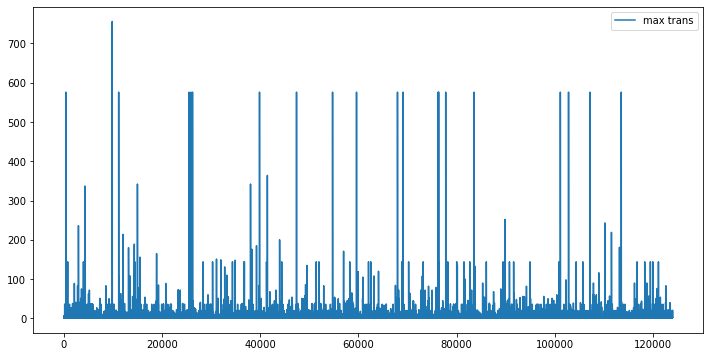

In [116]:
max_trans.plot(figsize=((12,6)))

### Average transaction per day

In [117]:
df1 = pd.read_sql_query("SELECT block_timestamp,from_address as address from combined_table_new", conn)
df2 = pd.read_sql_query("SELECT block_timestamp,to_address as address from combined_table_new", conn)
average_trans = pd.concat([df1,df2])
average_trans = average_trans[average_trans['address'] != "0x0000000000000000000000000000000000000000"]
average_trans['time'] = pd.to_datetime(average_trans['block_timestamp'])
average_trans = average_trans.groupby(['address','time']).count().mean(level=0)
average_trans = average_trans.rename(columns={'block_timestamp':'avg trans'})
average_trans = average_trans.reset_index()
average_trans.head()

/var/folders/05/23_04t197bs1fqrr4zpwzfl40000gn/T/ipykernel_70930/4081918803.py:6: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.median(level=1) should use df.groupby(level=1).median().
  average_trans = average_trans.groupby(['address','time']).count().mean(level=0)


,address,avg trans
0,0x0000000000000000000000000000000000000001,1.0
1,0x000000000000000000000000000000000000dead,1.0
2,0x0000000000015b23c7e20b0ea5ebd84c39dcbe60,1.0
3,0x000000000004d7463d0f9c77383600bc82d612f5,1.0
4,0x000000000006b92d1ca16b6e55071e8b5626d5d6,2.0


In [118]:
print(average_trans.describe())
print("account number:",average_trans.shape[0])

          avg trans
count  123931.00000
mean        1.31788
std         5.75646
min         1.00000
25%         1.00000
50%         1.00000
75%         1.00000
max       756.00000
account number: 123931


<AxesSubplot:>

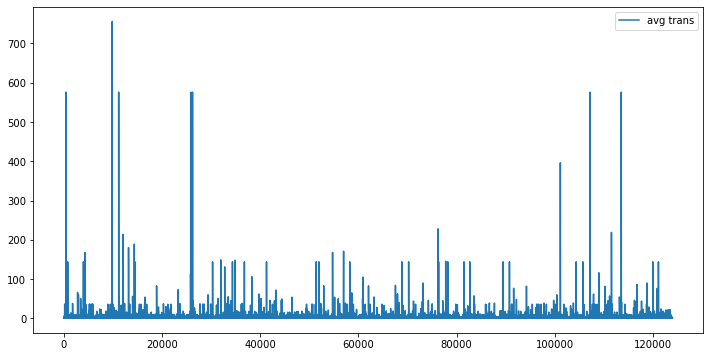

In [119]:
average_trans.plot(figsize=((12,6)))

### Since Minted Average

In [80]:
df1 = pd.read_sql_query("SELECT block_timestamp,from_address as address,token_id,collection_name from combined_table_new", conn)
df2 = pd.read_sql_query("SELECT block_timestamp,to_address as address,token_id,collection_name from combined_table_new", conn)
average_minted = pd.concat([df1,df2])
average_minted = average_minted[average_minted['address'] != "0x0000000000000000000000000000000000000000"]
average_minted['time'] = pd.to_datetime(average_minted['block_timestamp']).dt.strftime('%d-%b-%y')
average_minted['time'] = pd.to_datetime(average_minted['time'])
minted_date = pd.read_sql_query("SELECT * from collection_minted", conn)
df_minted = average_minted.merge(minted_date, on=['collection_name','token_id'], how='left')
df_minted = df_minted.rename(columns={'date':'minted_date'})
df_minted['minted_date'] = pd.to_datetime(df_minted['minted_date'])
df_minted['since_minted'] = df_minted['time'] - df_minted['minted_date']
df_minted.head()


,block_timestamp,address,token_id,collection_name,time,minted_date,since_minted
0,2022-06-27 10:39:48+00:00,0x36a5bc205df1ed65c86301022cfc343a6ce546ff,4367,ArtBlocks,2022-06-27,2020-12-22,552 days
1,2022-06-27 10:39:48+00:00,0x36a5bc205df1ed65c86301022cfc343a6ce546ff,2000336,ArtBlocks,2022-06-27,2020-11-27,577 days
2,2022-06-27 10:39:48+00:00,0x36a5bc205df1ed65c86301022cfc343a6ce546ff,1000093,ArtBlocks,2022-06-27,2020-11-27,577 days
3,2022-06-27 10:19:29+00:00,0x9106b49a05f842b58d56f8a5aea404d654867e26,1633,ArtBlocks,2022-06-27,2020-11-29,575 days
4,2022-06-27 03:51:41+00:00,0x802fa804b97ccef82331243feb6ba56c9b4281e0,5619,ArtBlocks,2022-06-27,2021-01-10,533 days


In [123]:
df_minted.head()

,block_timestamp,address,token_id,collection_name,time,minted_date,since_minted
0,2022-06-27 10:39:48+00:00,0x36a5bc205df1ed65c86301022cfc343a6ce546ff,4367,ArtBlocks,2022-06-27,2020-12-22,552 days
1,2022-06-27 10:39:48+00:00,0x36a5bc205df1ed65c86301022cfc343a6ce546ff,2000336,ArtBlocks,2022-06-27,2020-11-27,577 days
2,2022-06-27 10:39:48+00:00,0x36a5bc205df1ed65c86301022cfc343a6ce546ff,1000093,ArtBlocks,2022-06-27,2020-11-27,577 days
3,2022-06-27 10:19:29+00:00,0x9106b49a05f842b58d56f8a5aea404d654867e26,1633,ArtBlocks,2022-06-27,2020-11-29,575 days
4,2022-06-27 03:51:41+00:00,0x802fa804b97ccef82331243feb6ba56c9b4281e0,5619,ArtBlocks,2022-06-27,2021-01-10,533 days


In [131]:
avg_minted = df_minted[['address','since_minted']].groupby(['address']).mean()
avg_minted = avg_minted.rename(columns={'since_minted':'avg minted days'})
avg_minted = avg_minted.reset_index()
avg_minted['avg minted days'] = avg_minted['avg minted days'].dt.components.days
mean_val = int(avg_minted['avg minted days'].mean())
avg_minted['avg minted days'] = avg_minted['avg minted days'].fillna(mean_val)
avg_minted

,address,avg minted days
0,0x0000000000000000000000000000000000000001,675.0
1,0x000000000000000000000000000000000000dead,525.0
2,0x0000000000015b23c7e20b0ea5ebd84c39dcbe60,30.0
3,0x000000000004d7463d0f9c77383600bc82d612f5,32.0
4,0x000000000006b92d1ca16b6e55071e8b5626d5d6,130.0
...,...,...
123926,0xfffbed6df8f0a624dfa821a9e3bb9c51bd05f8da,27.0
123927,0xfffd50693ccbfe73892da30c1213a351f3e1775c,89.0
123928,0xfffd59651b59eb34bdffc11bfdb9de67fa4167d2,44.0
123929,0xfffdb73e1d371c56c5a71c1b13662e9985eaf680,11.0


In [132]:
print(avg_minted.describe())
print("account number:",avg_minted.shape[0])

       avg minted days
count    123931.000000
mean        146.319517
std         280.442493
min           0.000000
25%           9.000000
50%          59.000000
75%         159.000000
max        1829.000000
account number: 123931


<AxesSubplot:>

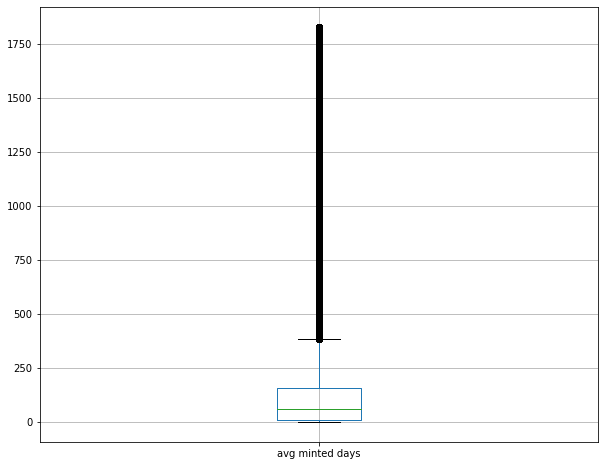

In [134]:
# avg_minted.plot(figsize=((12,6)))
avg_minted.boxplot(figsize=(10,8))  

### time-based features combined

In [135]:
time_features = average_time_in.merge(average_time_out).merge(diff_time_interval).merge(max_trans).merge(average_trans).merge(avg_minted)
time_features.head()

,address,interval in-transaction,interval out-transaction,diff time interval,max trans,avg trans,avg minted days
0,0x0000000000000000000000000000000000000001,NaT,NaT,NaT,1,1.0,675.0
1,0x000000000000000000000000000000000000dead,12 days 13:14:34.500000,NaT,NaT,1,1.0,525.0
2,0x0000000000015b23c7e20b0ea5ebd84c39dcbe60,NaT,NaT,NaT,1,1.0,30.0
3,0x000000000004d7463d0f9c77383600bc82d612f5,13 days 13:10:05.600000,15 days 13:39:38.250000,-3 days +23:30:27.350000,1,1.0,32.0
4,0x000000000006b92d1ca16b6e55071e8b5626d5d6,NaT,NaT,NaT,2,2.0,130.0


In [136]:
print("account number:",time_features.shape[0])

account number: 123931


<AxesSubplot:>

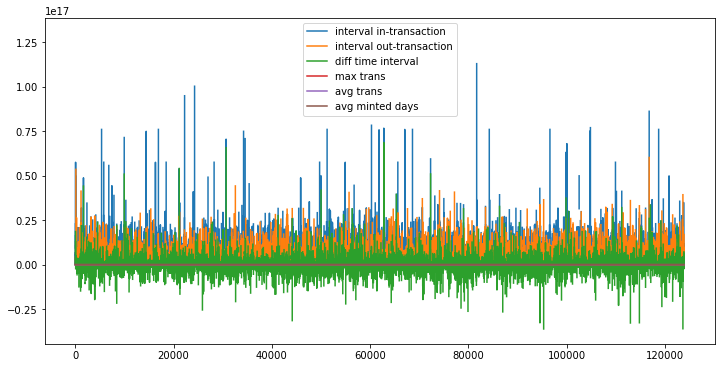

In [137]:
time_features.plot(figsize=((12,6)))